In [1]:
#本文是线性回归模型
import numpy as np
import matplotlib.pyplot as plt

#load data from file
#从txt文件导入数据，
def load_data(filename):
    data = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split(',')
        col_num = len(lineArr)
        temp = []
        for i in range(col_num):
            temp.append(float(lineArr[i]))
        data.append(temp)

    return np.array(data)

In [2]:
# 查看训练集
def draw_data(X,Y):
    plt.scatter(X[:,-1:],Y,color='b',marker='o')
    plt.xlabel('x')
    plt.xlabel('y')
    plt.show()

In [3]:
# 查看训练结果
def draw_result(X,Y):
    # 可视化边界线
    plt.subplot(211)
    plt.scatter(X[:, 1], Y, color='r', marker='x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X[:, 1], X.dot(theta), '-', color='black')
    # 可视化一下cost变化曲线
    plt.subplot(212)
    plt.plot(J_history)
    plt.xlabel('iters')
    plt.ylabel('cost')
    plt.show()


In [4]:
# 预测函数
def h(theta,X):
    return X.dot(theta)

# 代价函数
def cost_function(theta,X,Y):
    m = X.shape[0]
    result = np.sum(np.square(h(theta,X)-Y))/(2*m)
    return result

# 梯度下降
def gradient_descent(theta,X,Y,alpha,iterate_times):
    J_history = []
    m = X.shape[0]
    for i in range(iterate_times):
        theta = theta - alpha * X.T .dot(h(theta,X)-Y) / m
        cost = cost_function(theta, X, Y)
        J_history.append(cost)
    return theta, J_history

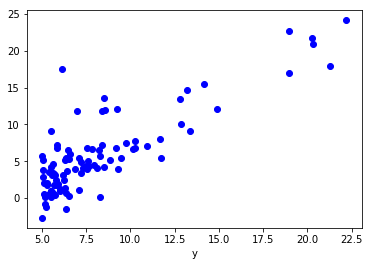

In [5]:
data = load_data('ex1data1.txt')
X = data[:,:-1]  # 使用数字指定列的话会返回一个一维数组，但是如果用切片则会返回二维的
X = np.hstack((np.ones((X.shape[0],1)),X)) #加一列
m = X.shape[0]   # 行数
# X.size = m*(n+1) theta.size = (n+1)*1
Y = data[:,-1:]
# 描述训练集
draw_data(X,Y)

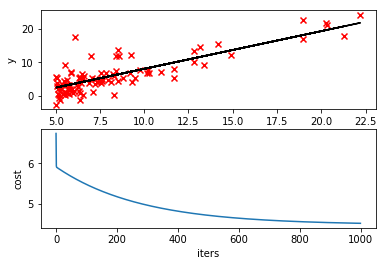

In [6]:
theta = np.zeros((2,1))
alpha = 0.01
iterate_times = 1000
# 训练
theta,J_history = gradient_descent(theta,X,Y,alpha,iterate_times)

# 描述训练结果
draw_result(X,Y)

(100, 100) 328.0929055495073 311.92025944831784


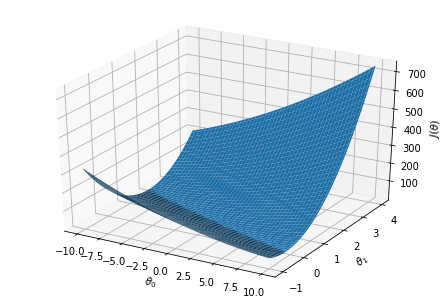

In [7]:
#可视化一下3d图像，因为J与theta0和theta1两个参数有关
#Visualizing J(theta_0, theta_1)
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

size = 100
theta0Vals = np.linspace(-10,10, size)
theta1Vals = np.linspace(-1, 4, size)
JVals = np.zeros((size, size))
for i in range(size):
    for j in range(size):
        col = np.array([[theta0Vals[i]], [theta1Vals[j]]]).reshape(-1,1)
        JVals[i,j] = cost_function(col,X,Y)

theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
JVals = JVals.T
print(JVals.shape,JVals[0,0],JVals[1,1]) #test correct

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(theta0Vals, theta1Vals, JVals)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

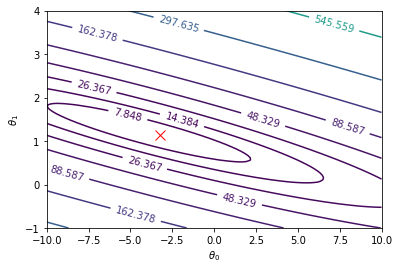

In [8]:
#绘制轮廓曲线,因为J与theta0和theta1两个参数有关
contourFig = plt.figure()
ax = contourFig.add_subplot(111)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

CS = ax.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,20))
plt.clabel(CS, inline=1, fontsize=10)

# 绘制最优解
ax.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)
plt.show()